# Reading Data, Cropping and Checking Images 

For this example, we will be checking the JWST NIRcam images, producing some crops and performing point spread function (PSF) matching. The NIRcam images are taken from the recent CEERS survey, specifically data release 0.5 which can be found here: https://ceers.github.io/dr05.html#nircam-imaging. 
The images consist of six wavebands: F115W, F150W, F200W, F277W, F356W and F444W.
Information on the set of imaging filters for NIRcam can be found here: https://jwst-docs.stsci.edu/jwst-near-infrared-camera/nircam-instrumentation/nircam-filters.


In [19]:
# import useful packages
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Remove warnings 
import warnings
warnings.filterwarnings('ignore')

List the input imaging data and the filters.

In [20]:
# list of filters
filters = ['f115w', 'f150w', 'f200w', 'f277w', 'f356w', 'f444w']
# number of filters
nbands = len(filters)
#data directory to the imaging data (use own directory)
data_dir = "/Users/ruby/Documents/Python Scripts/JWST/CEERS_dr0.5/"
# list of imaging data
fits_files = ['hlsp_ceers_jwst_nircam_nircam1_f115w_dr0.5_i2d.fits',
              'hlsp_ceers_jwst_nircam_nircam1_f150w_dr0.5_i2d.fits',
              'hlsp_ceers_jwst_nircam_nircam1_f200w_dr0.5_i2d.fits',
              'hlsp_ceers_jwst_nircam_nircam1_f277w_dr0.5_i2d.fits',
              'hlsp_ceers_jwst_nircam_nircam1_f356w_dr0.5_i2d.fits',
              'hlsp_ceers_jwst_nircam_nircam1_f444w_dr0.5_i2d.fits']

### Checking Images and Cropping ###
Due to the inhomogeneity of the imaging coverage among NIRcam filters and to reduce the memory usage, we will crop the original image data into two cropped regions, namely Crop 1 and Crop 2.
#### Crop Region 1 ####

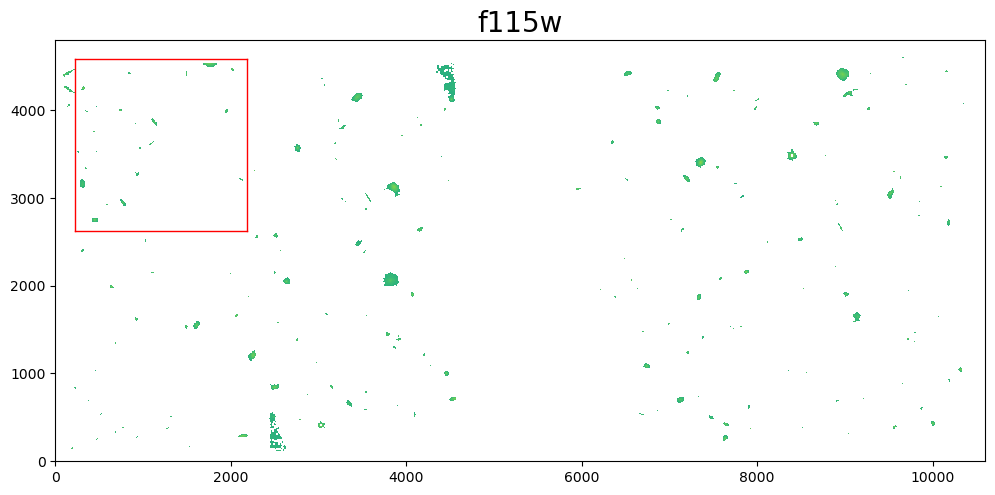

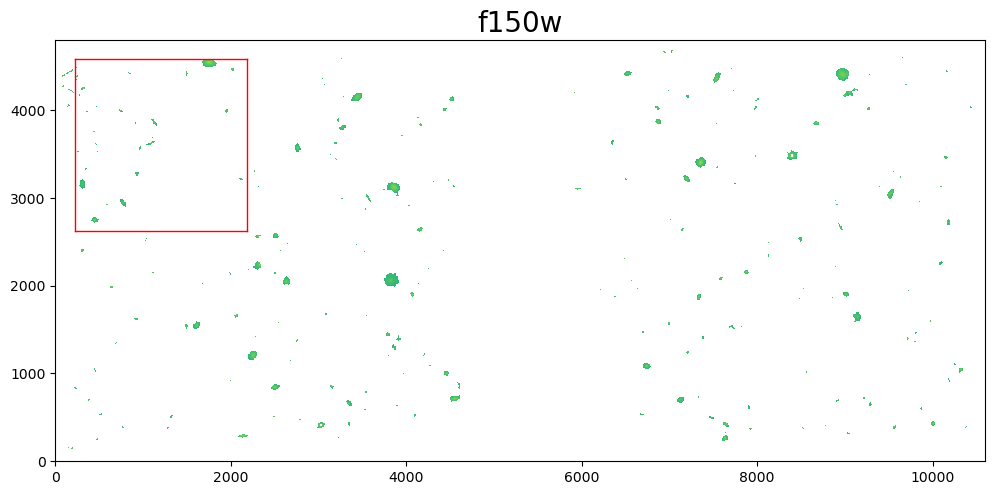

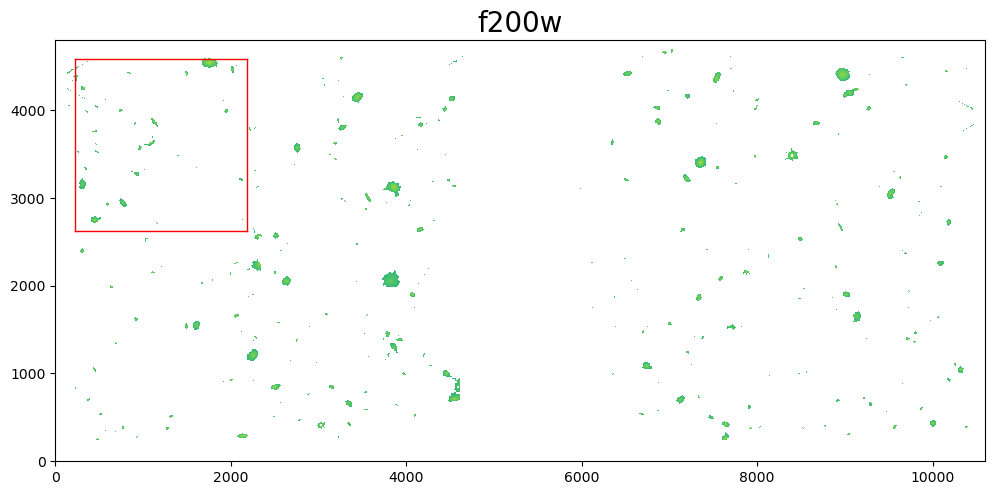

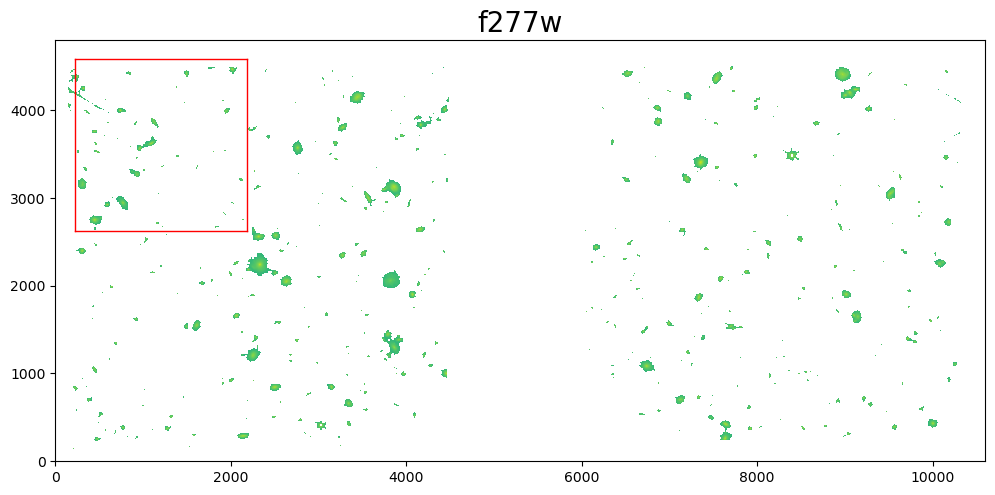

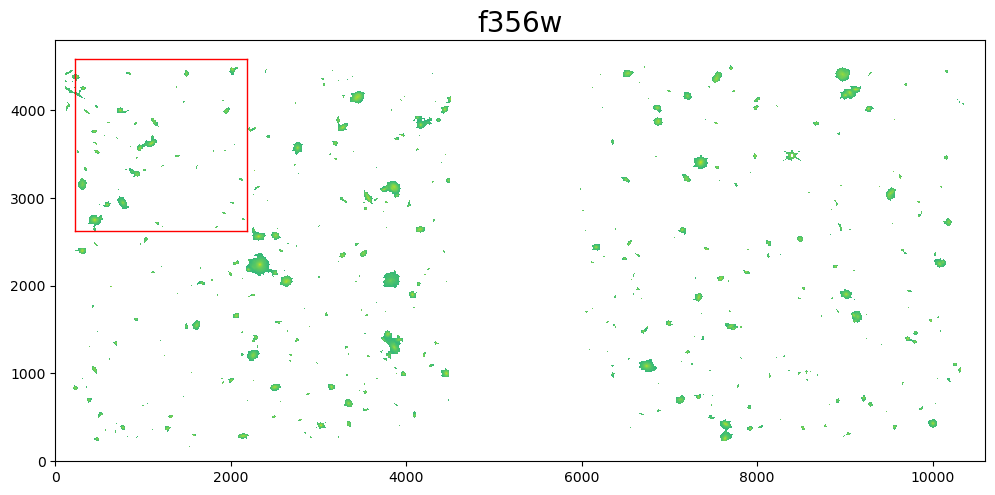

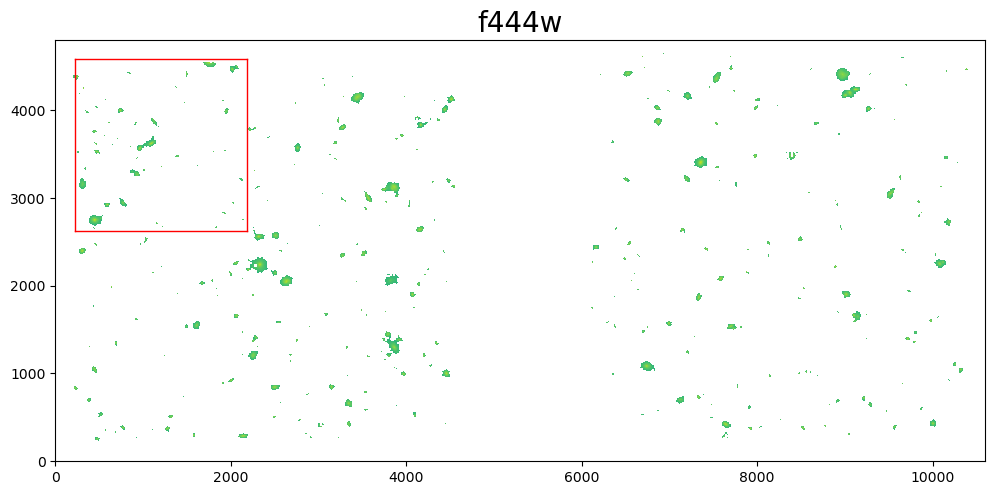

In [21]:
# The fits files are large, so, crop the files into two sections: crop1 and crop2
for i in range(0, nbands):
    hdu = fits.open(data_dir+fits_files[i])
    data_img = hdu['SCI'].data
    hdu.close()
    
    fig1 = plt.figure(figsize=(12,6))
    f1 = plt.subplot()
    plt.title('%s' % filters[i], fontsize=20)
    plt.imshow(np.log10(data_img), origin='lower')
    
    # boundary of the area to be cropped
    xmin, xmax = 220, 2180 
    ymin, ymax = 2620, 4580
    
    x = np.linspace(xmin, xmax, 100)
    y = ymin + x - x
    plt.plot(x, y, lw=1, color='red')
    y = ymax + x - x
    plt.plot(x, y, lw=1, color='red')
    
    y = np.linspace(ymin, ymax, 100)
    x = xmin + y - y
    plt.plot(x, y, lw=1, color='red')
    x = xmax + y - y
    plt.plot(x, y, lw=1, color='red')

Crop the region from the centre of the red boxes.

In [22]:
# Centre of red boxes to crop the images
x_c, y_c = xmin+(0.5*(xmax-xmin)), ymin+(0.5*(ymax-ymin))
print(x_c, y_c) 
crop_size = [ymax-ymin+1, xmax-xmin+1]
print(crop_size) 

1200.0 3600.0
[1961, 1961]


To crop the FITS files in the cropped regions, use the Cutout2D function from the astropy package. Information can be found here: https://docs.astropy.org/en/stable/nddata/utils.html.
This function will retain the WCS of the original image. In addition to cropping the images, we will also produce a crop of the variance images to perform psf-matching later. The variance images are the square of the uncertainty.

In [23]:
# Use Cutout2D to crop the fits files
from astropy.wcs import WCS
from astropy.nddata import Cutout2D

for i in range(0, nbands):
    # crop fits file image
    hdu = fits.open(data_dir+fits_files[i])[1]
    wcs = WCS(hdu.header)
    position = (x_c, y_c)
    cutout = Cutout2D(hdu.data, position=position, size=crop_size, wcs=wcs)
    name_out = 'crop1_%s' % fits_files[i]
    fits.writeto(name_out, cutout.data, cutout.wcs.to_header(), overwrite=True)
    print("[produce %s]" % name_out)

    # crop the variance images
    hdu = fits.open(data_dir+fits_files[i])[2]
    wcs = WCS(hdu.header)
    position = (x_c, y_c)
    cutout = Cutout2D(hdu.data, position=position, size=crop_size, wcs=wcs)
    name_out = 'crop1_var_%s' % fits_files[i]
    fits.writeto(name_out, np.square(cutout.data), cutout.wcs.to_header(), overwrite=True)
    print("[produce %s]" % name_out)

[produce crop1_hlsp_ceers_jwst_nircam_nircam1_f115w_dr0.5_i2d.fits]
[produce crop1_var_hlsp_ceers_jwst_nircam_nircam1_f115w_dr0.5_i2d.fits]
[produce crop1_hlsp_ceers_jwst_nircam_nircam1_f150w_dr0.5_i2d.fits]
[produce crop1_var_hlsp_ceers_jwst_nircam_nircam1_f150w_dr0.5_i2d.fits]
[produce crop1_hlsp_ceers_jwst_nircam_nircam1_f200w_dr0.5_i2d.fits]
[produce crop1_var_hlsp_ceers_jwst_nircam_nircam1_f200w_dr0.5_i2d.fits]
[produce crop1_hlsp_ceers_jwst_nircam_nircam1_f277w_dr0.5_i2d.fits]
[produce crop1_var_hlsp_ceers_jwst_nircam_nircam1_f277w_dr0.5_i2d.fits]
[produce crop1_hlsp_ceers_jwst_nircam_nircam1_f356w_dr0.5_i2d.fits]
[produce crop1_var_hlsp_ceers_jwst_nircam_nircam1_f356w_dr0.5_i2d.fits]
[produce crop1_hlsp_ceers_jwst_nircam_nircam1_f444w_dr0.5_i2d.fits]
[produce crop1_var_hlsp_ceers_jwst_nircam_nircam1_f444w_dr0.5_i2d.fits]


Let's check the cropped images for crop region 1.

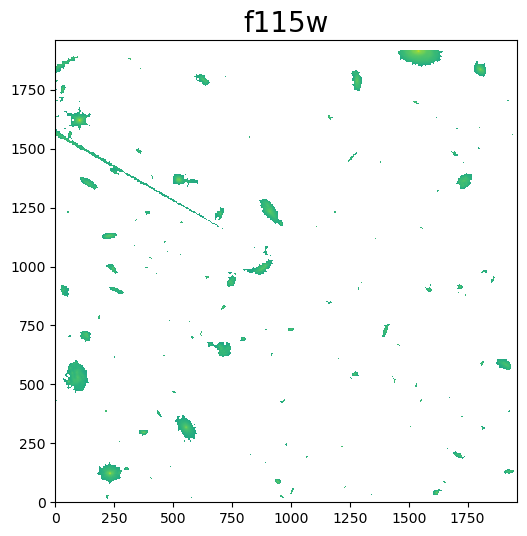

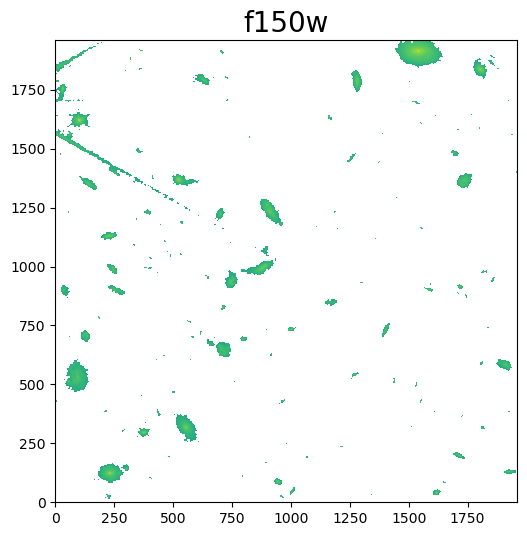

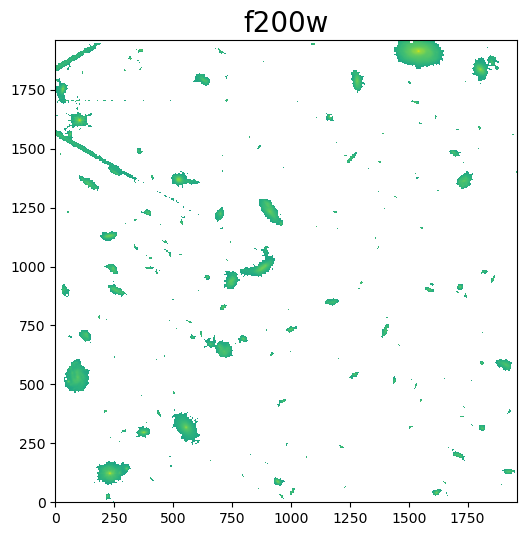

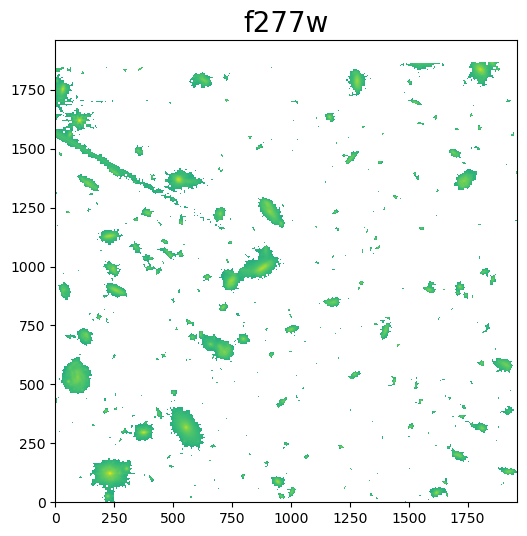

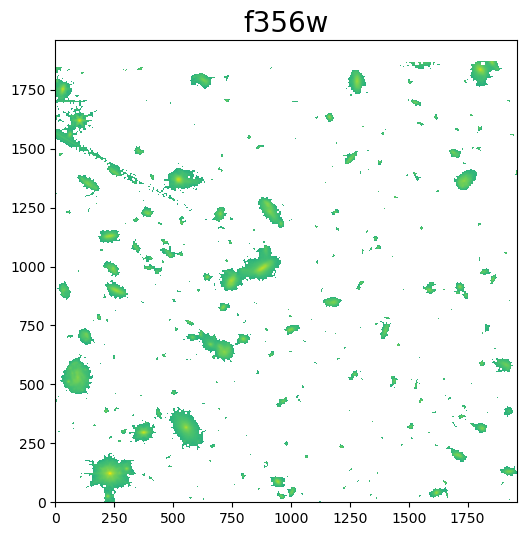

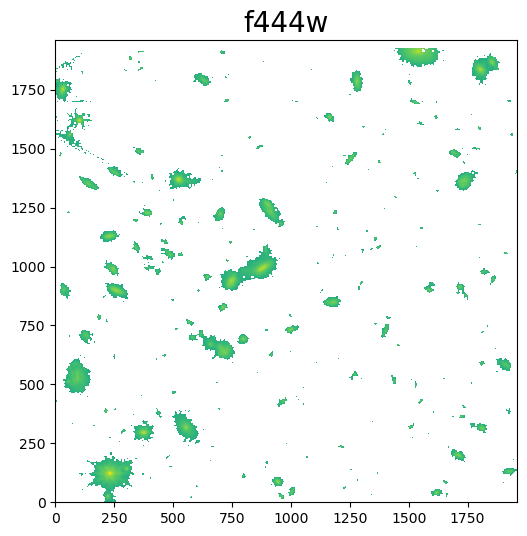

In [24]:
# Check the cropped images for crop 1
for i in range(0, nbands):
    hdu = fits.open('crop1_%s' % fits_files[i])
    data_img = hdu[0].data
    hdu.close()
    
    fig1 = plt.figure(figsize=(12,6))
    f1 = plt.subplot()
    plt.title('%s' % filters[i], fontsize=20)
    plt.imshow(np.log10(data_img), origin='lower') 

And for the cropped variance images for crop region 1.

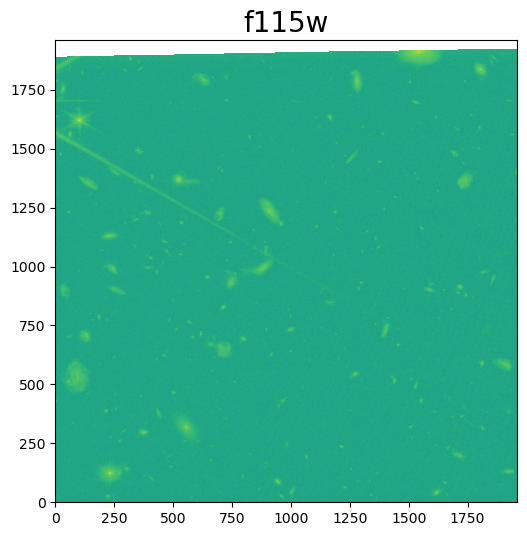

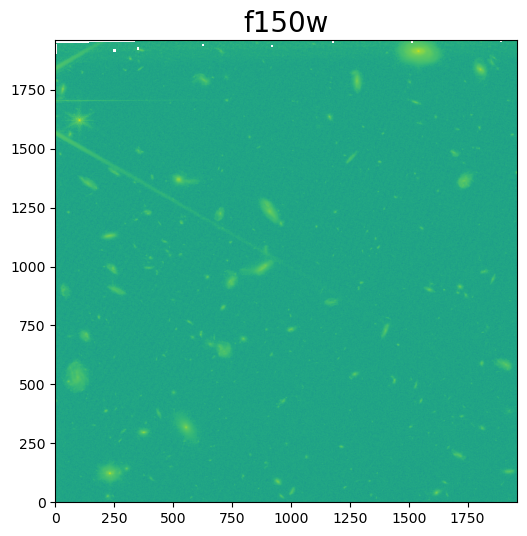

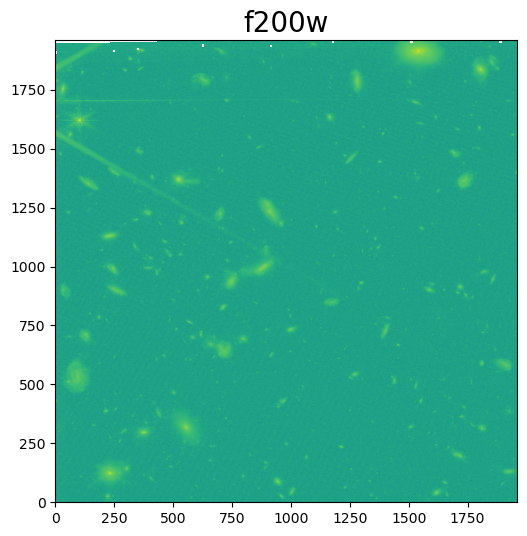

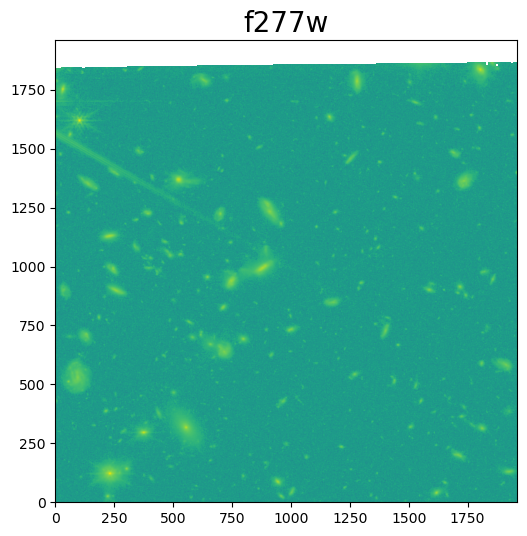

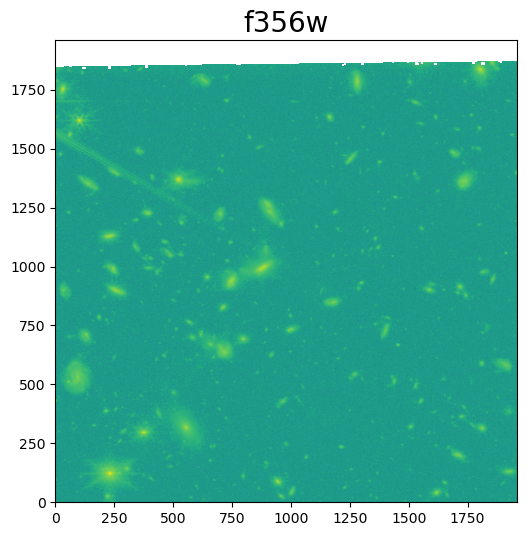

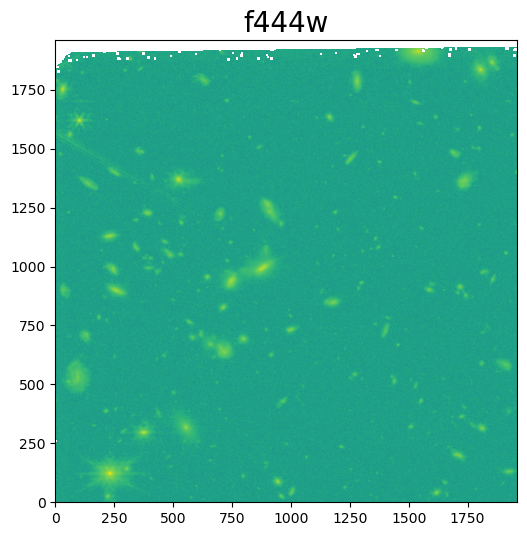

In [25]:
# Check cropped variance image
for i in range(0, nbands):
    hdu = fits.open('crop1_var_%s' % fits_files[i])
    data_img = hdu[0].data
    hdu.close()
    
    fig1 = plt.figure(figsize=(12,6))
    f1 = plt.subplot()
    plt.title('%s' % filters[i], fontsize=20)
    plt.imshow(np.log10(data_img), origin='lower') 

### Crop Region 2 ###
We repeat the above process for the cropped region 2.

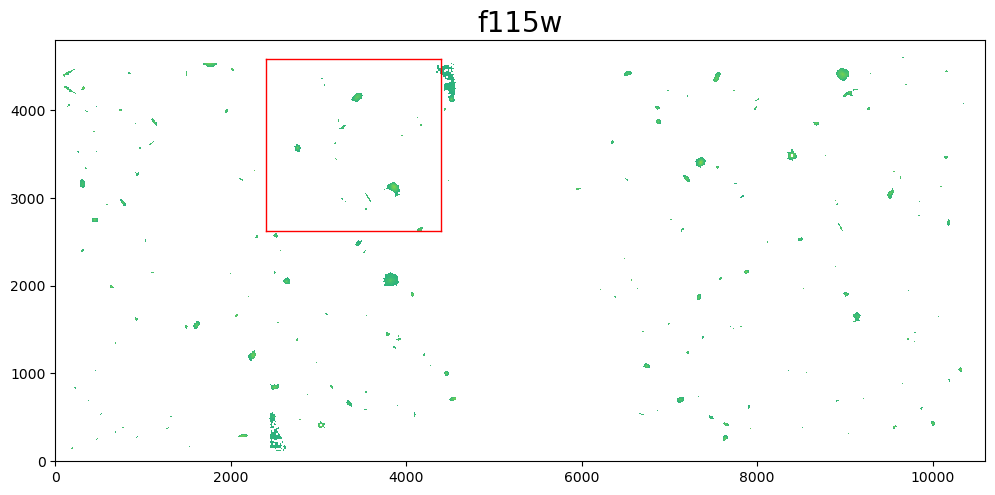

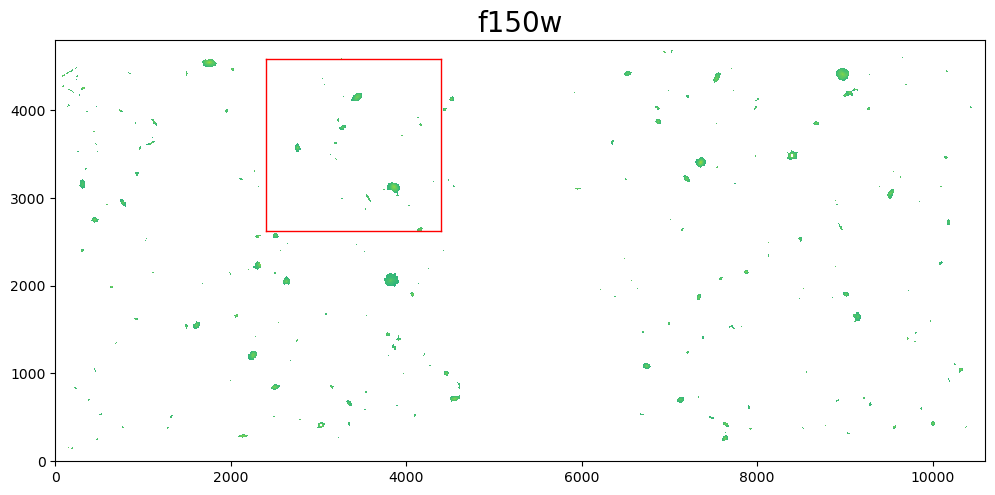

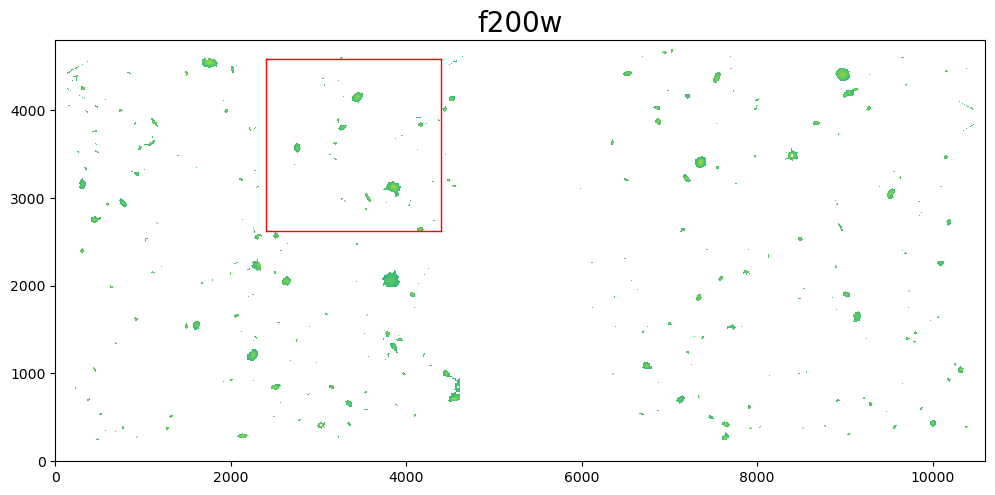

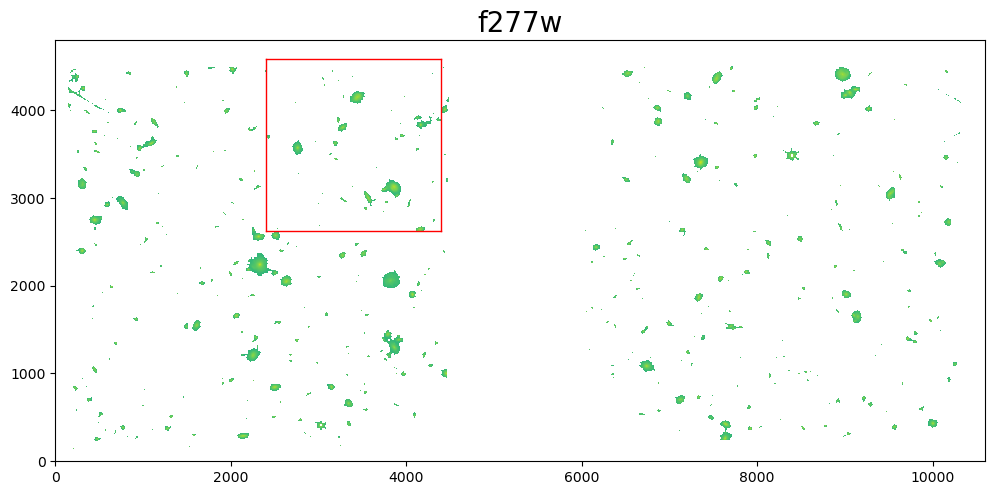

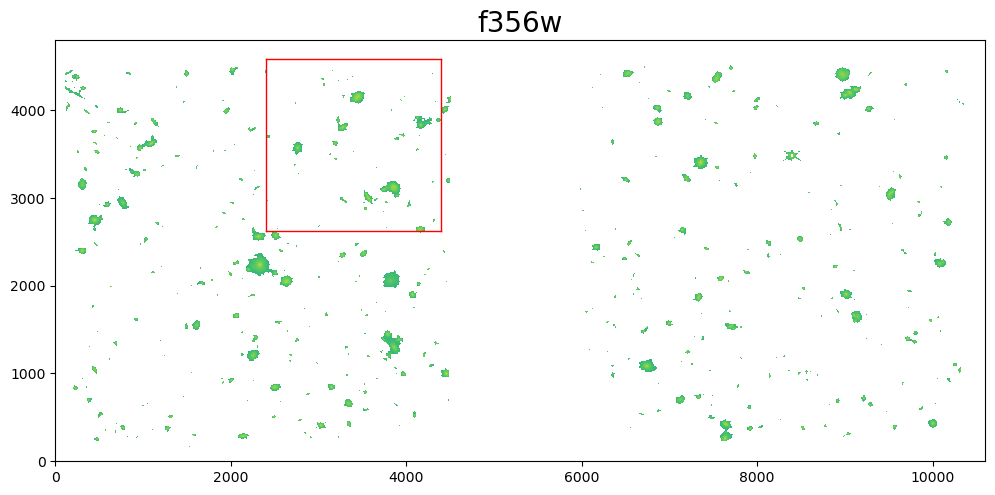

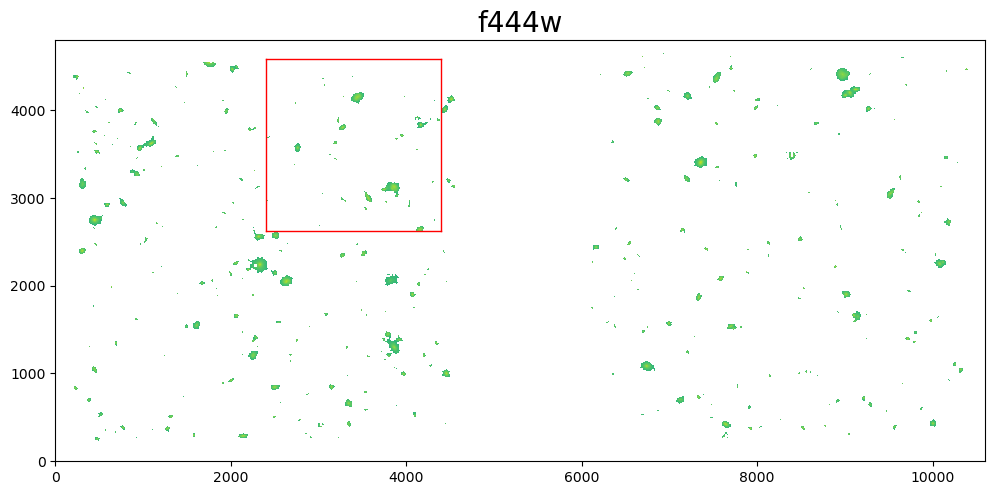

In [26]:
for i in range(0, nbands):
    hdu = fits.open(data_dir+fits_files[i])
    data_img = hdu['SCI'].data
    hdu.close()
    
    fig1 = plt.figure(figsize=(12,6))
    f1 = plt.subplot()
    plt.title('%s' % filters[i], fontsize=20)
    plt.imshow(np.log10(data_img), origin='lower')
    
    # boundary of the area to be cropped
    xmin, xmax = 2400, 4400 
    ymin, ymax = 2620, 4580
    
    x = np.linspace(xmin, xmax, 100)
    y = ymin + x - x
    plt.plot(x, y, lw=1, color='red')
    y = ymax + x - x
    plt.plot(x, y, lw=1, color='red')
    
    y = np.linspace(ymin, ymax, 100)
    x = xmin + y - y
    plt.plot(x, y, lw=1, color='red')
    x = xmax + y - y
    plt.plot(x, y, lw=1, color='red')

In [27]:
# Centre of red boxes to crop the images
x_c, y_c = xmin+(0.5*(xmax-xmin)), ymin+(0.5*(ymax-ymin))
print(x_c, y_c) 
crop_size = [ymax-ymin+1, xmax-xmin+1]
print(crop_size) 

3400.0 3600.0
[1961, 2001]


In [28]:
# use Cutout2D to crop the fits files
from astropy.wcs import WCS
from astropy.nddata import Cutout2D

for i in range(0, nbands):
    # crop fits file image
    hdu = fits.open(data_dir+fits_files[i])[1]
    wcs = WCS(hdu.header)
    position = (x_c, y_c)
    cutout = Cutout2D(hdu.data, position=position, size=crop_size, wcs=wcs)
    name_out = 'crop2_%s' % fits_files[i]
    fits.writeto(name_out, cutout.data, cutout.wcs.to_header(), overwrite=True)
    print("[produce %s]" % name_out)

    # crop the variance images
    hdu = fits.open(data_dir+fits_files[i])[2]
    wcs = WCS(hdu.header)
    position = (x_c, y_c)
    cutout = Cutout2D(hdu.data, position=position, size=crop_size, wcs=wcs)
    name_out = 'crop2_var_%s' % fits_files[i]
    fits.writeto(name_out, np.square(cutout.data), cutout.wcs.to_header(), overwrite=True)
    print("[produce %s]" % name_out)

[produce crop2_hlsp_ceers_jwst_nircam_nircam1_f115w_dr0.5_i2d.fits]
[produce crop2_var_hlsp_ceers_jwst_nircam_nircam1_f115w_dr0.5_i2d.fits]
[produce crop2_hlsp_ceers_jwst_nircam_nircam1_f150w_dr0.5_i2d.fits]
[produce crop2_var_hlsp_ceers_jwst_nircam_nircam1_f150w_dr0.5_i2d.fits]
[produce crop2_hlsp_ceers_jwst_nircam_nircam1_f200w_dr0.5_i2d.fits]
[produce crop2_var_hlsp_ceers_jwst_nircam_nircam1_f200w_dr0.5_i2d.fits]
[produce crop2_hlsp_ceers_jwst_nircam_nircam1_f277w_dr0.5_i2d.fits]
[produce crop2_var_hlsp_ceers_jwst_nircam_nircam1_f277w_dr0.5_i2d.fits]
[produce crop2_hlsp_ceers_jwst_nircam_nircam1_f356w_dr0.5_i2d.fits]
[produce crop2_var_hlsp_ceers_jwst_nircam_nircam1_f356w_dr0.5_i2d.fits]
[produce crop2_hlsp_ceers_jwst_nircam_nircam1_f444w_dr0.5_i2d.fits]
[produce crop2_var_hlsp_ceers_jwst_nircam_nircam1_f444w_dr0.5_i2d.fits]


### PSF Matching to Match Spacial Resolution ###
We will bring all images into the same spatial resolution as that of the F444W band. The PSF size varies among filters, so, all images will require the same spatial resolution to perform aperture photometry. In this step, we will perform PSF matching which is a process of matching the spatial resolution of multiband images.

PSF matching is done by convolving images with pre-calculated kernels. To calculate the kernels from PSF images, one can use the Photutils package: https://photutils.readthedocs.io/en/stable/psf_matching.html.

However, we will use kernels calculated using a technique given by Aniano et al (2011): https://ui.adsabs.harvard.edu/abs/2011PASP..123.1218A/abstract.
The kernels can be found here: https://www.astro.princeton.edu/~draine/Kernels/Kernels_JWST/Kernels_fits_Files/Hi_Resolution/.

In [29]:
# List of pre-calculated convolution kernels
dir_kernel = "/Users/ruby/Documents/Python Scripts/Kernels/"

kernels = ['Kernel_HiRes_JWST_NIRCam_F115W_to_JWST_NIRCam_F444W.fits',
           'Kernel_HiRes_JWST_NIRCam_F150W_to_JWST_NIRCam_F444W.fits',
           'Kernel_HiRes_JWST_NIRCam_F200W_to_JWST_NIRCam_F444W.fits',
           'Kernel_HiRes_JWST_NIRCam_F277W_to_JWST_NIRCam_F444W.fits',
           'Kernel_HiRes_JWST_NIRCam_F356W_to_JWST_NIRCam_F444W.fits']

We will PSF match both the images and the variance images in cropped regions 1 and 2. To do this, we will use astropy's convolve_fft function.
However, of importance, we must resize our kernels to match the pixel size of the image data. Note that the NIRcam data release from CEERs have a pixel size of 0.03 arcsec/pixel.

In [30]:
from astropy.convolution import convolve_fft
from photutils.psf.matching import resize_psf

# Pixel size
pixsize = .03

for i in range(0, nbands-1):
    # get the kernel data
    hdu = fits.open(dir_kernel+kernels[i])
    kernel_data = hdu[0].data
    pixscale = hdu[0].header['CD1_1']*3600.0
    hdu.close()
    
    # resize the kernel
    kernel_resize = resize_psf(kernel_data, pixscale, pixsize, order=3)
    
    # fits file image
    name = 'crop1_%s' % fits_files[i]
    hdu = fits.open(name)
    data_img = hdu[0].data
    header = hdu[0].header
    hdu.close()
    #psf matching
    psfmatch_data_img = convolve_fft(data_img, kernel_resize, allow_huge=True)
    # write to fits files
    name_out = 'psfmatch_%s' % name
    fits.writeto(name_out, psfmatch_data_img, header, overwrite=True)
    
    # do the same for the variance image
    name = 'crop1_var_%s' % fits_files[i]
    hdu = fits.open(name)
    data_img = hdu[0].data
    header = hdu[0].header
    hdu.close()
    #psf matching
    psfmatch_data_img = convolve_fft(data_img, kernel_resize, allow_huge=True)
    # write to fits files
    name_out = 'psfmatch_%s' % name
    fits.writeto(name_out, psfmatch_data_img, header, overwrite=True)

Check the images after PSF matching.

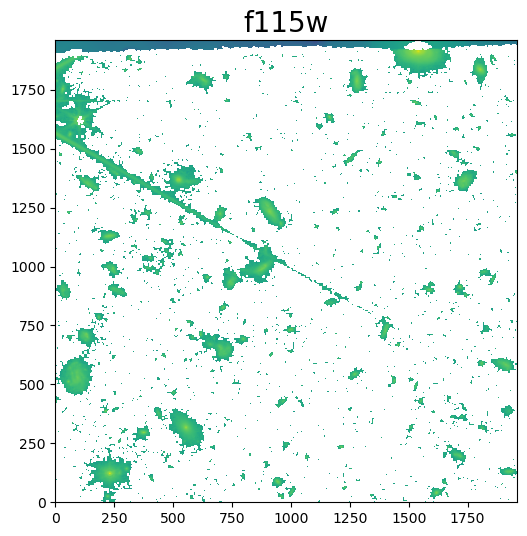

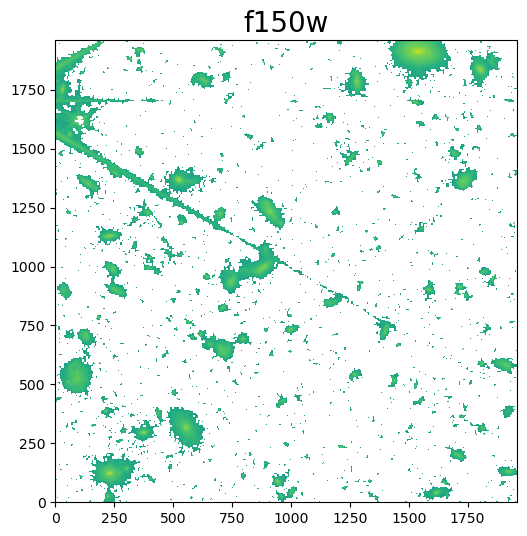

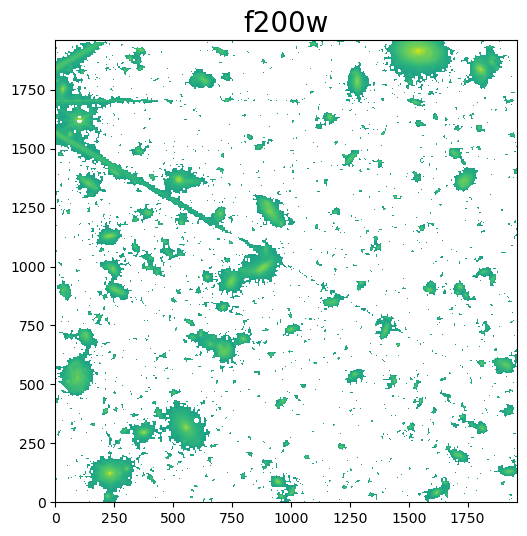

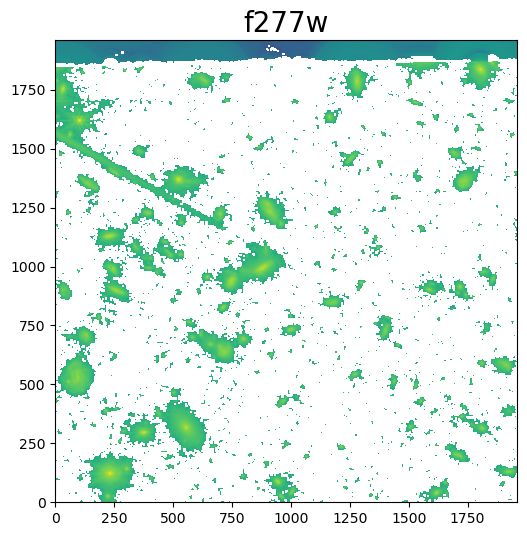

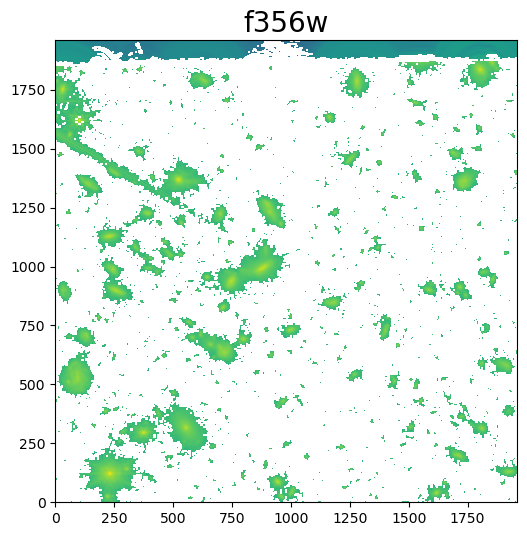

In [31]:
# Check
for i in range(0, nbands-1):
    if i < nbands-1:
        name = 'psfmatch_crop1_%s' % fits_files[i]
    else:
        name = 'crop1_%s' % fits_files[i]
    hdu = fits.open(name)
    data_img = hdu[0].data
    hdu.close()
    
    fig1 = plt.figure(figsize=(12,6))
    f1 = plt.subplot()
    plt.title('%s' % filters[i], fontsize=20)
    plt.imshow(np.log10(data_img), origin='lower')

#### PSF Matching of Cropped Region 2 ####
We will perform PSF matching in the same way as above for cropped region 2.

In [32]:
for i in range(0, nbands-1):
    # get the kernel data
    hdu = fits.open(dir_kernel+kernels[i])
    kernel_data = hdu[0].data
    pixscale = hdu[0].header['CD1_1']*3600.0
    hdu.close()
    
    # resize the kernel
    kernel_resize = resize_psf(kernel_data, pixscale, pixsize, order=3)
    
    # fits file image
    name = 'crop2_%s' % fits_files[i]
    hdu = fits.open(name)
    data_img = hdu[0].data
    header = hdu[0].header
    hdu.close()
    #psf matching
    psfmatch_data_img = convolve_fft(data_img, kernel_resize, allow_huge=True)
    # write to fits files
    name_out = 'psfmatch_%s' % name
    fits.writeto(name_out, psfmatch_data_img, header, overwrite=True)
    
    # do the same for the vaqriance image
    name = 'crop2_var_%s' % fits_files[i]
    hdu = fits.open(name)
    data_img = hdu[0].data
    header = hdu[0].header
    hdu.close()
    #psf matching
    psfmatch_data_img = convolve_fft(data_img, kernel_resize, allow_huge=True)
    # write to fits files
    name_out = 'psfmatch_%s' % name
    fits.writeto(name_out, psfmatch_data_img, header, overwrite=True)

And check the images.

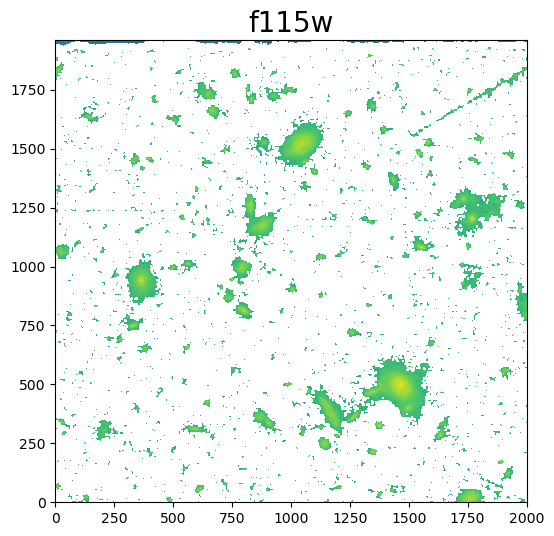

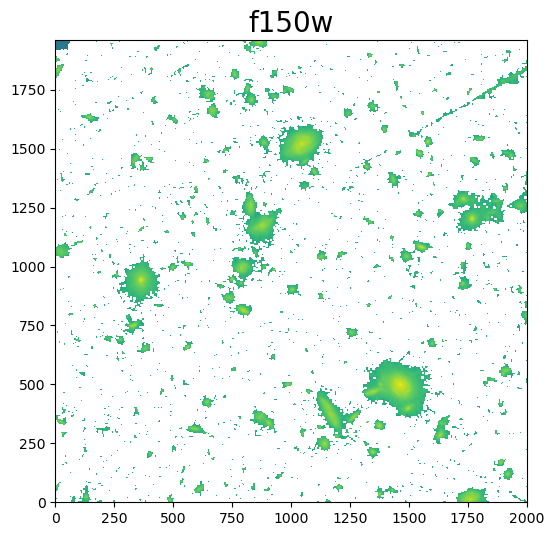

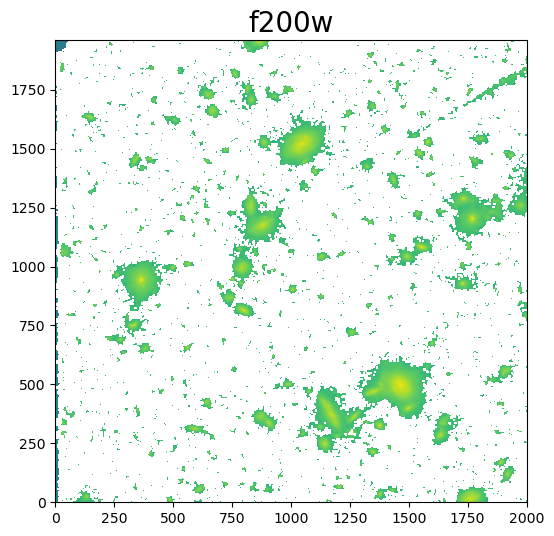

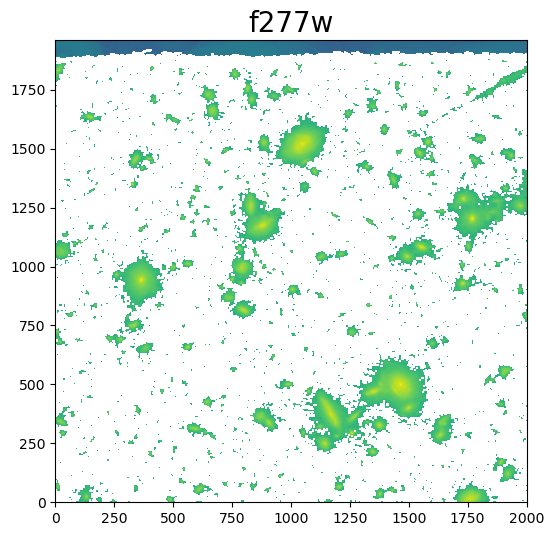

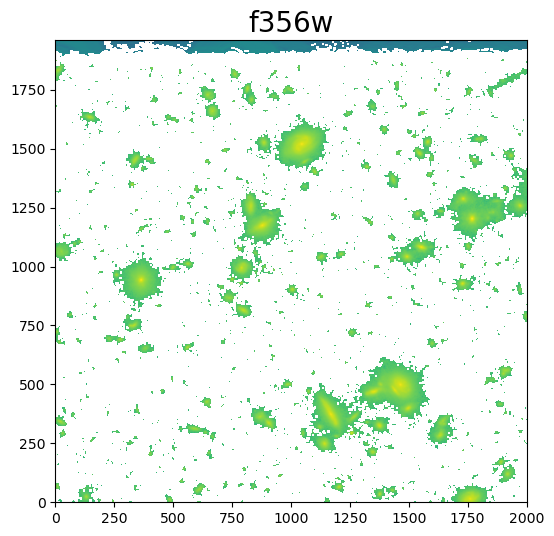

In [33]:
# Check
for i in range(0, nbands-1):
    if i < nbands-1:
        name = 'psfmatch_crop2_%s' % fits_files[i]
    else:
        name = 'crop2_%s' % fits_files[i]
    hdu = fits.open(name)
    data_img = hdu[0].data
    hdu.close()
    
    fig1 = plt.figure(figsize=(12,6))
    f1 = plt.subplot()
    plt.title('%s' % filters[i], fontsize=20)
    plt.imshow(np.log10(data_img), origin='lower')